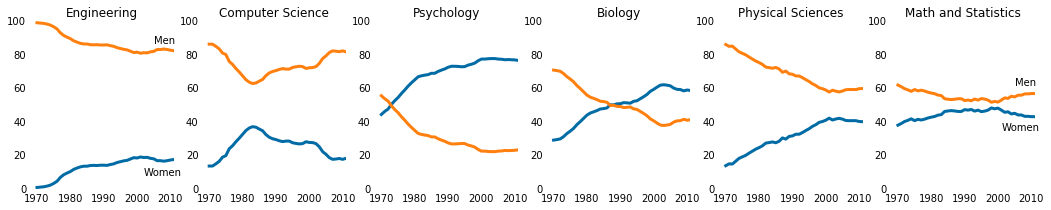

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

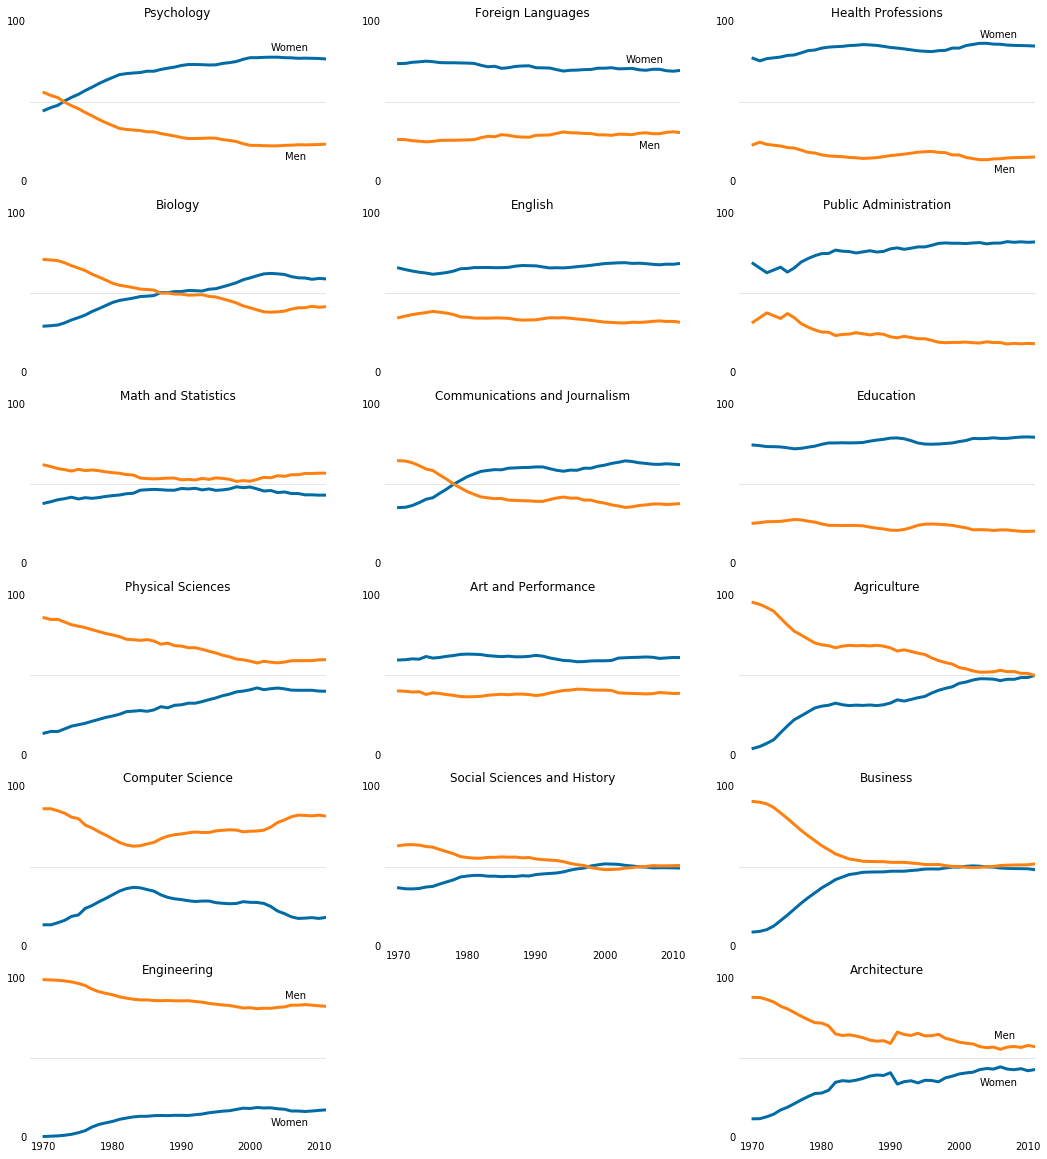

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize=(18, 20))

def generate_charts(position, x, y, title):
    spines_positions = ['left', 'right', 'top', 'bottom']
    
    ax = fig.add_subplot(6,3, position)
    ax.plot(x, y, c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(x, 100-y, c=cb_orange, label='Men', linewidth=3)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(title)
    ax.set_yticks([0, 100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    for pos in spines_positions: ax.spines[pos].set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

    if (position == 1 or position == 2 or position == 3):
        ax.text(2005, 100 - (y.iloc[-1] + 10), 'Men')
        ax.text(2003, y.iloc[-1] + 5, 'Women')
    
    if (position == 16 or position == 18):
        ax.text(2005, 100 - (y.iloc[-1] - 5), 'Men')
        ax.text(2003, y.iloc[-1] - 10, 'Women')
        ax.tick_params(labelbottom='on')

    if (position == 14):
        ax.tick_params(labelbottom='on')
        
        
index = 1
for cat in range(0, len(stem_cats)):
    generate_charts(index, women_degrees['Year'], women_degrees[stem_cats[cat]], stem_cats[cat])
    index = index + 3

index = 2
for cat in range(0, len(lib_arts_cats)):
    generate_charts(index, women_degrees['Year'], women_degrees[lib_arts_cats[cat]], lib_arts_cats[cat])
    index = index + 3
    
index = 3
for cat in range(0, len(other_cats)):
    generate_charts(index, women_degrees['Year'], women_degrees[other_cats[cat]], other_cats[cat])
    index = index + 3


plt.savefig('gender_degrees.png')
plt.show()
